# Lab Assignment 3 -- Control Flow & Functions
In this lab, you will complete a series of exercises related to the lecture material on control flow and functions.

## Exercise 1a -- Divisible by n
Define a function called `divisible_by_n()` that takes two inputs:
- a range
- a single integer (the n)

By default, the single integer argument should be equal to 2 if only one argument is provided.

You function should return a list of all numbers in the input range that are divisible by `n`.

Include a function description for your function using docstrings.

**Hints**
- You can use `%` (for modular arithmetic) or you can use `math.round()` to check if a number is divisible by 3.
- Think about whether you should to use a `for` loop or a `while` loop.

In [9]:
# Exercise 1a
divisible_by_n = lambda range, n: [x for x in range if x % n == 0]
#this function gives you those integers that can are divisible by the given integer in a given range
divisible_by_n(range(6),2)

[0, 2, 4]

## Exercise 1b -- Big Lists
`%timeit` in the code below is what is known as an IPython magic function. IPython stands for Interactive Python and simply refers to a version of the Python (and other coding languages) environment that has more functionality than the standard one. In particular, this functionality makes Python easier to interact with if we want to explore data, test functions, etc. Jupyter is built on IPython.

`%timeit` runs the code that follows it many times to get a sense of how long the code takes to run. Below, we use it to time how long `divide_by_n` takes on two ranges of different lengths.

Run the cell and answer the following questions in a Markdown cell:
1. Which range takes longer to get through? By how many times longer does it take? Does this make sense to you? What does it say about how the time of computation is affected by the length of the range?
2. Would your function work with a list instead of a range? Why or why not?

**Hint:** $\mu s$ means microseconds

In [10]:
# Exercise 1b -- don't edit this cell
%timeit divisible_by_n(range(1_001), 3)
%timeit divisible_by_n(range(10_001), 3)

79.4 µs ± 3.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
929 µs ± 260 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Response to 1b

In [ ]:
#1.the second one takes about 10 times longer than the first one to run.
#it indicates that the longer the length is the more time it takes.
#maybe it's in proportion...for the length is also about 10 times longer
#2.It works! I think as long as numbers make up the list, it's ok, be it float or integer.




In [17]:
divisible_by_n([1,2,3,4,5,8,100,101.1,7.9], 3)

[3]

## Exercise 2 -- Function Objects vs. Function Calls
`sum()` is a function that can take some iterables and return the sum of elements in that iterable. In the Markdown cell below, answer the following questions.
1. What types is `sum`?
2. What type is `sum([1,2,3])`? How about `sum([1,2.0,3])`?
3. Are the types of these three objects the same or different? Why?
4. What is the type of `print("hello")`? Why?


In [19]:
# If needed, you can call the type function on these objects to help answer the question
print(type(sum))
print(type(sum([1,2,3])))
print(type(sum([1,2.0,3])))
print(type(print("hello")))

<class 'builtin_function_or_method'>
<class 'int'>
<class 'float'>
hello
<class 'NoneType'>


### Reponse to Exercise 2

# Exercise 3
Exercise 3 is a series of six questions
## Exercise 3a -- Factorial Function
The factorial of an integer n (denoted n! in mathematics) is equal to itself multipled by all of the integers smaller than n. That is
$$
n! = n * (n-1) * (n-2) *...* 2 * 1
$$
where $0!$ is defined to be 1.

The module `math` already has a factorial function, but you are going to build your own. In the cell below, define a function called `custom_factorial` that takes an integer as an input and returns the factorial of that integer. You must use a loop to calculate the factorial.

In [18]:
# Exercise 3a Code
custom_factorial = lambda n: 1 if n == 0 else n * custom_factorial(n-1)
custom_factorial(4)

24

## Exercise 3b -- Checking Your Work
Using the `math` module's `factorial` function and a comparison operator, check that your function works for 10!.


In [19]:
# Exercise 3b Code
import math
math.factorial(10) == custom_factorial(10)

True

## Exercise 3c -- Nondecreasing Functions
A function $f$ is nondecreasing when $f(x) \geq f(y)$  if and only if $x \geq y$. Using `matplotlib.pyplot`, and your function plot the factorial function for $n = 0, 1, 2, 3, ..., 20$. You can plot a scatter plot or a line plot.

In the Markdown cell below, give another example of a nondecreasing function.

**Hint:** Use a a list comprehension.

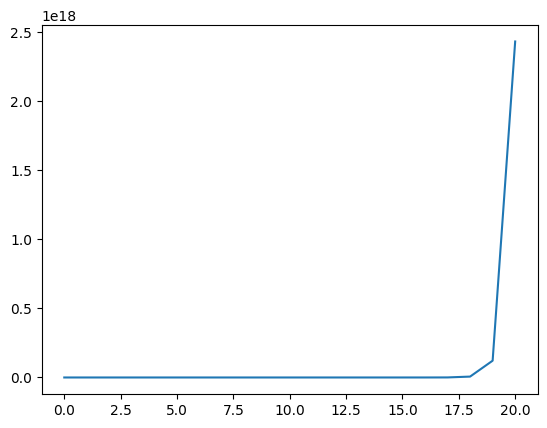

In [22]:
# Exercise 3c Code
import matplotlib.pyplot as plt
x = [i for i in range(21)]
y = [custom_factorial(i) for i in range(21)]
plt.plot(x,y)

### Response to Exercise 3c

f(x)=2x

## Exercise 3d -- Finding the Smallest Integer
For a generic nondecreasing function $f$, we might be interested in finding the smallest integer $n$ such that $f(n)$ is greater than or equal to some constant $c$. In the lecture we did this with $f(n) = n^2$, which is nondecreasing for $n \geq 0$, and $c = 12345$.

Now, define a function calld `find_smallest_int` that takes a starting value `start`, a function `f`, and a constant `c` as inputs. Recognizing that these correspond to the values above, have your function return two values: the smallest integer $n$ such that $f(n) \geq c$ and the value of $f(n)$ for that integer.

**Hint:** If you're stuck, try looking at the lecture.

In [20]:
# Exercise 3d Code
def find_smallest_int(start, f, c):
    n = start
    while f(n) < c:
        n += 1
    return n, f(n)
find_smallest_int(0, custom_factorial, 12345)

(8, 40320)

In [6]:
find_smallest_int(0, lambda x: x ** 2, 12345)

(112, 12544)

## Exercise 3e -- Plugging in Your Function
Now, use `find_smallest_int` and `custom_factorial` to find the smallest $n$ such that $n! \geq 12,345$. Use a starting value of 0. Check your answer as we did in the lecture.


In [21]:
# Exercise 3e Code
find_smallest_int(0, custom_factorial, 12345)

(8, 40320)

## Exercise 3f -- Increasing n
Now we wil time the speed and output of `find_smallest_int` with smaller and larger values of $c$ and two different functions: `custom_factorial` and and a lambda function that sqaures a single input.

Answer the folowing questions in the Markdown cell below:
1. Which function takes longer to run for a fixed value of $c$. Why do you think this is?
2. What is the ratio between runtimes when fixing the function and varying $c$ from 1,000 to 10,000. How about 10,000 to 100,000? Compare this ratio to the ratio of smallest integers for those runs. Are they similar? Why or why not?  You will want to write some code to compare these values.


In [22]:
# Exercise 1b -- don't edit this cell
%timeit find_smallest_int(0, custom_factorial, 1_000)
%timeit find_smallest_int(0, custom_factorial, 10_000)
%timeit find_smallest_int(0, custom_factorial, 100_000)



%timeit find_smallest_int(0, lambda x: x ** 2, 1_000)
%timeit find_smallest_int(0, lambda x: x ** 2, 10_000)
%timeit find_smallest_int(0, lambda x: x ** 2, 100_000)

7.1 µs ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.63 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.92 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.6 µs ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
36.4 µs ± 759 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
132 µs ± 28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
# Compare ratios here
#lambda takes more time maybe because they deal with new instructions everytime while the defined ones are like stored inside
#the time increases like exponentially?idk...

### Response to Exercise 3f

## Exercise 4 -- Fibonacci Sequence
The Fibonacci Sequence is an infinite sequence of integers $X_0, X_1, X_2, X_3, ...$ defined as below

$$
X_0 = 0
$$
$$
X_1 = 1
$$
$$
\hspace{3.66cm}X_t = X_{t-1} + X_{t-2} \text{ for } t \geq 2
$$

Below define a function called `fibo_seq` that takes $t$ as an input and returns $X_t$, the $t$-th element of the Fibonacci Sequence.


In [2]:
## Exercise 4 Code
def fibo_seq(t):
    if t==0 or t==1:
        return t
    else:
        return fibo_seq(t-1)+t

In [4]:
fibo_seq(5)

15

## Exercise 5 -- Palindrome Detector
A palindrome is a word or phrase that is spelled the same backwards as it is forwards (ignoring spaces). Create a function called `is_palindrome` that takes a list of strings and returns a list of Boolean variables that indicate whether the respective string is a palindrome or not. **Ignore capitalization and spaces**.

When you're ready, test your function out on the cell below where `palindromes` and `nonpalindromes` are defined. Your function should return `[True, True, True, True, True]` for the former and `[False, False, False]` for the latter.


**Hints**
- A method will help you get rid of the white space
- Look up on Google how to reverse a string as the reverse method only exists for lists

In [10]:
# Exercise 5 -- create is_palindrome function here

In [12]:
def is_palindrome(words):
  """
  This function takes a list of strings and returns a list of Booleans
  indicating whether each string is a palindrome.

  Args:
    words: A list of strings.

  Returns:
    A list of Booleans.
  """
  result = []
  for word in words:
    processed_word = ''.join(word.lower().split())
    result.append(processed_word == processed_word[::-1])
  return result



In [13]:
# Run this cell when you're ready -- do not edit it
palindromes = ["Radar", "Taco cat", "Stressed Desserts", "no Lemon no melon", "!??!!??!"]
nonpalindromes = ["Hello World", "VSP", "Vancouver Canada"]

print(is_palindrome(palindromes))
is_palindrome(nonpalindromes)

[True, True, True, True, True]


[False, False, False]